<a href="https://colab.research.google.com/github/Gladwellchebelyon/Traffic-Crashes/blob/main/Traffic_Crashes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Traffic Crashes in Chicago City.

 # Introduction
 Traffic accidents are a major concern in urban areas, causing significant human and economic costs. In Chicago, thousands of traffic crashes occur annually, leading to injuries, fatalities, and extensive property damage. Understanding the factors that contribute to these crashes and predicting their severity can help city planners and public safety officials implement effective measures to improve road safety. This project leverages data from the City of Chicago’s Traffic Crashes dataset to build predictive models that identify high-risk scenarios and provide actionable insights.

# Project Overview

This project aims to analyze traffic accident data from the City of Chicago to predict the primary contributory cause of accidents. By applying machine learning techniques to this problem, we can identify key factors contributing to accidents, which can inform policy decisions, improve traffic safety, and reduce future accidents.

The dataset contains various features related to accidents, such as weather conditions, lighting conditions, and roadway surface conditions, among others. The target variable is the 'Primary Contributory Cause,' which we are modeling as a multi-class classification problem.


Let us import all the necessary libraries for this problem in the cell below:

In [5]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

np.random.seed(42)

# Business understanding

Traffic accidents are a significant public safety issue. Understanding the factors that lead to accidents can help city planners, traffic engineers, and policymakers implement more effective safety measures. The objective of this project is to build a model that can accurately predict the primary contributory cause of an accident, providing actionable insights that can be used to reduce the frequency and severity of traffic accidents.


# Data Understanding

The dataset used in this project was obtained from the City of Chicago's Traffic Crashes database. It includes detailed information about each accident, such as:

- **Crash Date:** The date and time of the crash.
- **Weather Conditions:** Describes the weather at the time of the crash.
- **Roadway Surface Conditions:** Describes the condition of the road surface.
- **Lighting Conditions:** Describes the lighting conditions during the crash.
- **Traffic Control Device:** The type of traffic control device present at the crash location.

The target variable, 'Primary Contributory Cause,' is a categorical variable that indicates the main reason behind the crash.


# Data Preparation

Data preparation involved several key steps:

1. **Handling Missing Values:** Columns with a high percentage of missing values were carefully imputed or excluded from the analysis to ensure the integrity of the dataset.
2. **Feature Engineering:** We created new features such as sine and cosine transformations for time-related features to capture cyclic patterns in the data. Additionally, we created interaction features to better capture the relationship between speed and weather conditions.
3. **Binning and Trimming:** The target variable 'Primary Contributory Cause' was binned into fewer categories to address the issue of class imbalance and to simplify the modeling process.
4. **Data Splitting:** The data was split into training and test sets to evaluate model performance.


We shall begin by first understanding the dataset, that is by loading the dataset and defining the first few columns.

       

 ### Load the Dataset

In [6]:
import pandas as pd
df = pd.read_csv("Traffic_Crashes_-_Crashes_20240824.csv")
print(df.head())
print(df.info())
print(df.describe())


                                     CRASH_RECORD_ID CRASH_DATE_EST_I  \
0  23a79931ef555d54118f64dc9be2cf2dbf59636ce253f7...              NaN   
1  2675c13fd0f474d730a5b780968b3cafc7c12d7adb661f...              NaN   
2  5f54a59fcb087b12ae5b1acff96a3caf4f2d37e79f8db4...              NaN   
3  7ebf015016f83d09b321afd671a836d6b148330535d5df...              NaN   
4  6c1659069e9c6285a650e70d6f9b574ed5f64c12888479...              NaN   

               CRASH_DATE  POSTED_SPEED_LIMIT TRAFFIC_CONTROL_DEVICE  \
0  09/05/2023 07:05:00 PM                  30         TRAFFIC SIGNAL   
1  09/22/2023 06:45:00 PM                  50            NO CONTROLS   
2  07/29/2023 02:45:00 PM                  30         TRAFFIC SIGNAL   
3  08/09/2023 11:00:00 PM                  30            NO CONTROLS   
4  08/18/2023 12:50:00 PM                  15                  OTHER   

       DEVICE_CONDITION WEATHER_CONDITION      LIGHTING_CONDITION  \
0  FUNCTIONING PROPERLY             CLEAR                  

In [7]:
df.columns

Index(['CRASH_RECORD_ID', 'CRASH_DATE_EST_I', 'CRASH_DATE',
       'POSTED_SPEED_LIMIT', 'TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION',
       'WEATHER_CONDITION', 'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE',
       'TRAFFICWAY_TYPE', 'LANE_CNT', 'ALIGNMENT', 'ROADWAY_SURFACE_COND',
       'ROAD_DEFECT', 'REPORT_TYPE', 'CRASH_TYPE', 'INTERSECTION_RELATED_I',
       'NOT_RIGHT_OF_WAY_I', 'HIT_AND_RUN_I', 'DAMAGE', 'DATE_POLICE_NOTIFIED',
       'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE', 'STREET_NO',
       'STREET_DIRECTION', 'STREET_NAME', 'BEAT_OF_OCCURRENCE',
       'PHOTOS_TAKEN_I', 'STATEMENTS_TAKEN_I', 'DOORING_I', 'WORK_ZONE_I',
       'WORK_ZONE_TYPE', 'WORKERS_PRESENT_I', 'NUM_UNITS',
       'MOST_SEVERE_INJURY', 'INJURIES_TOTAL', 'INJURIES_FATAL',
       'INJURIES_INCAPACITATING', 'INJURIES_NON_INCAPACITATING',
       'INJURIES_REPORTED_NOT_EVIDENT', 'INJURIES_NO_INDICATION',
       'INJURIES_UNKNOWN', 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH',
       'LATITUDE', 

### Check for missing values

In [8]:
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])


CRASH_DATE_EST_I                 3827
LANE_CNT                         3275
REPORT_TYPE                        83
INTERSECTION_RELATED_I           3241
NOT_RIGHT_OF_WAY_I               3908
HIT_AND_RUN_I                    3035
SEC_CONTRIBUTORY_CAUSE              1
STREET_NO                           1
STREET_DIRECTION                    3
STREET_NAME                         1
BEAT_OF_OCCURRENCE                  3
PHOTOS_TAKEN_I                   4045
STATEMENTS_TAKEN_I               3998
DOORING_I                        4089
WORK_ZONE_I                      4073
WORK_ZONE_TYPE                   4076
WORKERS_PRESENT_I                4092
NUM_UNITS                           1
MOST_SEVERE_INJURY                 10
INJURIES_TOTAL                     10
INJURIES_FATAL                     10
INJURIES_INCAPACITATING            10
INJURIES_NON_INCAPACITATING        10
INJURIES_REPORTED_NOT_EVIDENT      10
INJURIES_NO_INDICATION             10
INJURIES_UNKNOWN                   10
CRASH_HOUR  

### Check for duplicates

In [9]:

duplicate_rows = df[df.duplicated()]
print(duplicate_rows)


Empty DataFrame
Columns: [CRASH_RECORD_ID, CRASH_DATE_EST_I, CRASH_DATE, POSTED_SPEED_LIMIT, TRAFFIC_CONTROL_DEVICE, DEVICE_CONDITION, WEATHER_CONDITION, LIGHTING_CONDITION, FIRST_CRASH_TYPE, TRAFFICWAY_TYPE, LANE_CNT, ALIGNMENT, ROADWAY_SURFACE_COND, ROAD_DEFECT, REPORT_TYPE, CRASH_TYPE, INTERSECTION_RELATED_I, NOT_RIGHT_OF_WAY_I, HIT_AND_RUN_I, DAMAGE, DATE_POLICE_NOTIFIED, PRIM_CONTRIBUTORY_CAUSE, SEC_CONTRIBUTORY_CAUSE, STREET_NO, STREET_DIRECTION, STREET_NAME, BEAT_OF_OCCURRENCE, PHOTOS_TAKEN_I, STATEMENTS_TAKEN_I, DOORING_I, WORK_ZONE_I, WORK_ZONE_TYPE, WORKERS_PRESENT_I, NUM_UNITS, MOST_SEVERE_INJURY, INJURIES_TOTAL, INJURIES_FATAL, INJURIES_INCAPACITATING, INJURIES_NON_INCAPACITATING, INJURIES_REPORTED_NOT_EVIDENT, INJURIES_NO_INDICATION, INJURIES_UNKNOWN, CRASH_HOUR, CRASH_DAY_OF_WEEK, CRASH_MONTH, LATITUDE, LONGITUDE, LOCATION]
Index: []

[0 rows x 48 columns]


### Handling missing values

We have seen that our dataset has no duplicates whilst there are crucial missing values in features that are realted to our target variable, therefore we will handle the missing values in the following cells by employing the right procedures

In [10]:
df['WEATHER_CONDITION'].fillna(df['WEATHER_CONDITION'].mode()[0], inplace=True)


In [11]:
df['LIGHTING_CONDITION'].fillna(df['LIGHTING_CONDITION'].mode()[0], inplace=True)


In [12]:
df['ROADWAY_SURFACE_COND'].fillna(df['ROADWAY_SURFACE_COND'].mode()[0], inplace=True)


In [13]:
df['TRAFFIC_CONTROL_DEVICE'].fillna(df['TRAFFIC_CONTROL_DEVICE'].mode()[0], inplace=True)


In [14]:
df['DEVICE_CONDITION'].fillna(df['DEVICE_CONDITION'].mode()[0], inplace=True)


In [15]:
df['DEVICE_CONDITION'].fillna(df['DEVICE_CONDITION'].mode()[0], inplace=True)


In [16]:
df['INTERSECTION_RELATED_I'].fillna(df['INTERSECTION_RELATED_I'].mode()[0], inplace=True)


In [17]:
df['NOT_RIGHT_OF_WAY_I'].fillna(df['NOT_RIGHT_OF_WAY_I'].mode()[0], inplace=True)


In [18]:
df['MOST_SEVERE_INJURY'].fillna(df['MOST_SEVERE_INJURY'].mode()[0], inplace=True)


In [19]:
df.drop(['PHOTOS_TAKEN_I', 'STATEMENTS_TAKEN_I', 'DOORING_I', 'WORK_ZONE_I',
         'WORK_ZONE_TYPE', 'WORKERS_PRESENT_I', 'STREET_NO', 'STREET_DIRECTION',
         'STREET_NAME', 'BEAT_OF_OCCURRENCE','CRASH_DATE_EST_I'], axis=1, inplace=True)


In [20]:
df['HIT_AND_RUN_I'].fillna(df['HIT_AND_RUN_I'].mode()[0], inplace=True)


In [21]:
df['LANE_CNT'].fillna(df['LANE_CNT'].median(), inplace=True)
df['LATITUDE'].fillna(df['LATITUDE'].median(), inplace=True)
df['LONGITUDE'].fillna(df['LONGITUDE'].median(), inplace=True)


In [22]:
injury_columns = [
    'INJURIES_TOTAL', 'INJURIES_FATAL', 'INJURIES_INCAPACITATING',
    'INJURIES_NON_INCAPACITATING', 'INJURIES_REPORTED_NOT_EVIDENT',
    'INJURIES_NO_INDICATION', 'INJURIES_UNKNOWN'
]
df[injury_columns] = df[injury_columns].fillna(0)


In [23]:
df['LOCATION'].fillna(method='ffill', inplace=True)


In [24]:

df['REPORT_TYPE'].fillna(df['REPORT_TYPE'].mode()[0], inplace=True)


In [25]:
 df['LOCATION'].fillna(method='bfill', inplace=True)

##### Check if any crucial missing values are still there

In [26]:
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])


SEC_CONTRIBUTORY_CAUSE    1
NUM_UNITS                 1
CRASH_HOUR                1
CRASH_DAY_OF_WEEK         1
CRASH_MONTH               1
dtype: int64


# Feature engineering, Binning and Trimming.

Our Dataset, unfortunately, has already feature engineered features such as CRASH_HOUR, CRASH_MONTH etc, therefore we will use a model to view top 10 features that are related to our target variable.

In the cell below, we will run a Logistic Regression model with Preprocessing Pipelines because of our alrge dataset. This code will also help in preparing categorical and numerical features for modeling.

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder


df_sampled = df.sample(frac=0.01, random_state=42)

X = df_sampled.drop('PRIM_CONTRIBUTORY_CAUSE', axis=1)
y = df_sampled['PRIM_CONTRIBUTORY_CAUSE']


categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(exclude=['object']).columns


preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='median'), numerical_cols),
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), categorical_cols)
    ])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

model = LogisticRegression(max_iter=100, random_state=42, n_jobs=-1)
model.fit(X_train, y_train)


LogisticRegression(n_jobs=-1, random_state=42)

### From the trained Logistic Regression Model above, let us extract coefficients by manually creating features then analyze the importance of each feature.  

In [28]:
import numpy as np
import pandas as pd

feature_names = []

for col in numerical_cols:
    feature_names.append(col)

for col in categorical_cols:
    categories = preprocessor.named_transformers_['cat']['onehot'].categories_[categorical_cols.get_loc(col)]
    feature_names.extend([f"{col}_{category}" for category in categories])

coefficients = model.coef_[0]

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

importance_df['Abs_Coefficient'] = np.abs(importance_df['Coefficient'])
importance_df = importance_df.sort_values(by='Abs_Coefficient', ascending=False)

print(importance_df.head(20))


                                               Feature  Coefficient  \
10                                          CRASH_HOUR     0.356884   
8                               INJURIES_NO_INDICATION    -0.274562   
0                                   POSTED_SPEED_LIMIT    -0.254983   
186  LOCATION_POINT (-87.663669905025 41.923524728039)     0.170691   
64                   CRASH_DATE_08/02/2023 08:50:00 PM     0.170691   
43   CRASH_RECORD_ID_7406e768c305f7f1bc8e4b494fa945...     0.170691   
150        DATE_POLICE_NOTIFIED_08/02/2023 08:55:00 PM     0.170691   
166  SEC_CONTRIBUTORY_CAUSE_FAILING TO REDUCE SPEED...     0.169386   
109                            TRAFFICWAY_TYPE_ONE-WAY     0.153169   
92                         LIGHTING_CONDITION_DARKNESS     0.142089   
98               FIRST_CRASH_TYPE_PARKED MOTOR VEHICLE     0.140829   
174        MOST_SEVERE_INJURY_NONINCAPACITATING INJURY     0.126408   
173         MOST_SEVERE_INJURY_NO INDICATION OF INJURY    -0.126302   
124   

### Why the code above;
   Feature Names Construction: The code reconstructs the feature names after preprocessing, including one-hot encoding for categorical variables.
   Model Coefficients: It extracts the coefficients from the trained logistic regression model to understand how each feature contributes to the prediction.
   Feature Importance: By sorting the coefficients by their absolute values, it identifies which features are most important in the model, providing insights into the key drivers of the target variable.

####  Lets transform time-related features into a format that better represents their cyclic nature, potentially improving the performance and interpretability our machine learning models

In [29]:
import numpy as np

df['CRASH_HOUR_sin'] = np.sin(2 * np.pi * df['CRASH_HOUR'] / 24)
df['CRASH_HOUR_cos'] = np.cos(2 * np.pi * df['CRASH_HOUR'] / 24)

df['CRASH_DAY_OF_WEEK_sin'] = np.sin(2 * np.pi * df['CRASH_DAY_OF_WEEK'] / 7)
df['CRASH_DAY_OF_WEEK_cos'] = np.cos(2 * np.pi * df['CRASH_DAY_OF_WEEK'] / 7)

df['CRASH_MONTH_sin'] = np.sin(2 * np.pi * df['CRASH_MONTH'] / 12)
df['CRASH_MONTH_cos'] = np.cos(2 * np.pi * df['CRASH_MONTH'] / 12)


### Improving model predictive power

There are some engineered features that need to be added to our raw features so as to enhance the model's ability to predict the primary contributory cause of traffic accidents by incorporating important contextual information.

##### Why These Features?
Is_Weekend:

Weekends often have different traffic patterns compared to weekdays, which can influence the likelihood and types of crashes.
By explicitly capturing whether a crash occurred on a weekend, the model can learn to differentiate between weekday and weekend crashes.
Speed_Weather_Interaction:

This interaction term is valuable because the effect of speed limits on crashes might differ depending on the weather.
For example, a high speed limit might be particularly dangerous in poor weather conditions. This feature allows the model to capture that relationship.

In [30]:
df['Speed_Weather_Interaction'] = df['POSTED_SPEED_LIMIT'] * df['WEATHER_CONDITION'].factorize()[0]


In [31]:
df['Is_Weekend'] = df['CRASH_DAY_OF_WEEK'].apply(lambda x: 1 if x in [6, 7] else 0)


##### In the cell below, let us check the frequency of causes, so we can se how closely each feature is related to the target variable

In [32]:
cause_counts = df['PRIM_CONTRIBUTORY_CAUSE'].value_counts()
print(cause_counts)


PRIM_CONTRIBUTORY_CAUSE
UNABLE TO DETERMINE                                                                 1545
FAILING TO YIELD RIGHT-OF-WAY                                                        451
FOLLOWING TOO CLOSELY                                                                378
NOT APPLICABLE                                                                       232
IMPROPER OVERTAKING/PASSING                                                          202
IMPROPER LANE USAGE                                                                  200
IMPROPER BACKING                                                                     183
IMPROPER TURNING/NO SIGNAL                                                           154
FAILING TO REDUCE SPEED TO AVOID CRASH                                               151
DRIVING SKILLS/KNOWLEDGE/EXPERIENCE                                                  146
DISREGARDING TRAFFIC SIGNALS                                                          

##### Binning Rare Causes: Helps to avoid overfitting by reducing the number of categories the model must distinguish between, especially when some categories have very few samples.
.

In [33]:
threshold = 0.01 * len(df)
rare_causes = cause_counts[cause_counts < threshold].index
df['PRIM_CONTRIBUTORY_CAUSE_BINNED'] = df['PRIM_CONTRIBUTORY_CAUSE'].replace(rare_causes, 'Other')


##### Filtering to Top N Causes: Keeps the focus on the most common causes, which are likely to be the most important for your analysis.

In [34]:
top_n_causes = df['PRIM_CONTRIBUTORY_CAUSE_BINNED'].value_counts().head(10).index
df = df[df['PRIM_CONTRIBUTORY_CAUSE_BINNED'].isin(top_n_causes)]

##### Mode-Based Feature: Adds a contextual feature that can help the model understand how weather conditions correlate with speed limits.

In [35]:

df['Weather_Condition_Mode'] = df.groupby('POSTED_SPEED_LIMIT')['WEATHER_CONDITION'].transform(lambda x: x.mode()[0])


##### Dropping Unnecessary Columns: Simplifies the dataset by removing features that have been replaced by more informative engineered features.

In [36]:

df.drop(['CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH', 'POSTED_SPEED_LIMIT'], axis=1, inplace=True)


In [37]:
y = df['PRIM_CONTRIBUTORY_CAUSE_BINNED']

##### Because we had already define our  x and y, we will have to redefine so that the target variable will be in line wit the new created features.

In [38]:

X = df.drop(['PRIM_CONTRIBUTORY_CAUSE', 'PRIM_CONTRIBUTORY_CAUSE_BINNED'], axis=1)
y = df['PRIM_CONTRIBUTORY_CAUSE_BINNED']




# Exploratory Data Analysis (EDA)

EDA was conducted to gain insights into the data distribution and relationships between features and the target variable:

- **Univariate Analysis:** Histograms and box plots were used to examine the distribution of numerical features and their relationship with the target variable.
- **Bivariate Analysis:** Pair plots and heatmaps were employed to explore correlations between features and how they relate to the 'Primary Contributory Cause.'
- **Multivariate Analysis:** Advanced visualization techniques such as interaction plots were used to understand how combinations of features impact accident outcomes.

These analyses helped identify important patterns and informed the feature engineering process.


### Univariate Analysis:

Histograms and box plots were used to examine the distribution of numerical features and their relationship with the target variable.

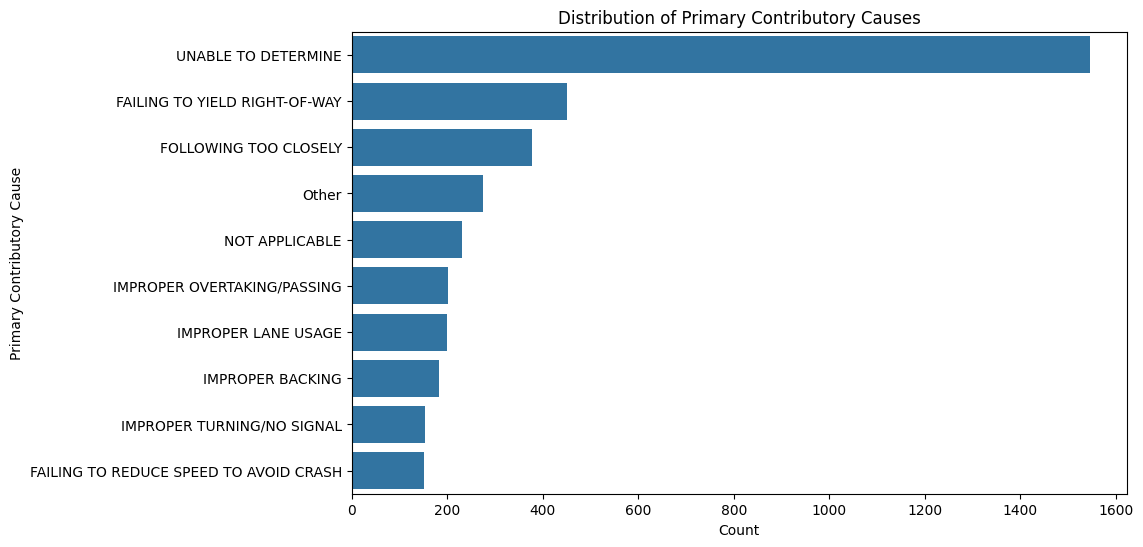

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.countplot(y='PRIM_CONTRIBUTORY_CAUSE_BINNED', data=df, order=df['PRIM_CONTRIBUTORY_CAUSE_BINNED'].value_counts().index)
plt.title('Distribution of Primary Contributory Causes')
plt.xlabel('Count')
plt.ylabel('Primary Contributory Cause')
plt.show()


##### Let us check the columns after performing feature engineering and binning, just to be sure we define numerical and categorical columns.

In [40]:
print(df.columns)


Index(['CRASH_RECORD_ID', 'CRASH_DATE', 'TRAFFIC_CONTROL_DEVICE',
       'DEVICE_CONDITION', 'WEATHER_CONDITION', 'LIGHTING_CONDITION',
       'FIRST_CRASH_TYPE', 'TRAFFICWAY_TYPE', 'LANE_CNT', 'ALIGNMENT',
       'ROADWAY_SURFACE_COND', 'ROAD_DEFECT', 'REPORT_TYPE', 'CRASH_TYPE',
       'INTERSECTION_RELATED_I', 'NOT_RIGHT_OF_WAY_I', 'HIT_AND_RUN_I',
       'DAMAGE', 'DATE_POLICE_NOTIFIED', 'PRIM_CONTRIBUTORY_CAUSE',
       'SEC_CONTRIBUTORY_CAUSE', 'NUM_UNITS', 'MOST_SEVERE_INJURY',
       'INJURIES_TOTAL', 'INJURIES_FATAL', 'INJURIES_INCAPACITATING',
       'INJURIES_NON_INCAPACITATING', 'INJURIES_REPORTED_NOT_EVIDENT',
       'INJURIES_NO_INDICATION', 'INJURIES_UNKNOWN', 'LATITUDE', 'LONGITUDE',
       'LOCATION', 'CRASH_HOUR_sin', 'CRASH_HOUR_cos', 'CRASH_DAY_OF_WEEK_sin',
       'CRASH_DAY_OF_WEEK_cos', 'CRASH_MONTH_sin', 'CRASH_MONTH_cos',
       'Speed_Weather_Interaction', 'Is_Weekend',
       'PRIM_CONTRIBUTORY_CAUSE_BINNED', 'Weather_Condition_Mode'],
      dtype='object')


In [41]:
numerical_cols = [
    'LANE_CNT', 'NUM_UNITS', 'INJURIES_TOTAL', 'INJURIES_FATAL',
    'INJURIES_INCAPACITATING', 'INJURIES_NON_INCAPACITATING',
    'INJURIES_REPORTED_NOT_EVIDENT', 'INJURIES_NO_INDICATION',
    'INJURIES_UNKNOWN', 'LATITUDE', 'LONGITUDE', 'Speed_Weather_Interaction'
]


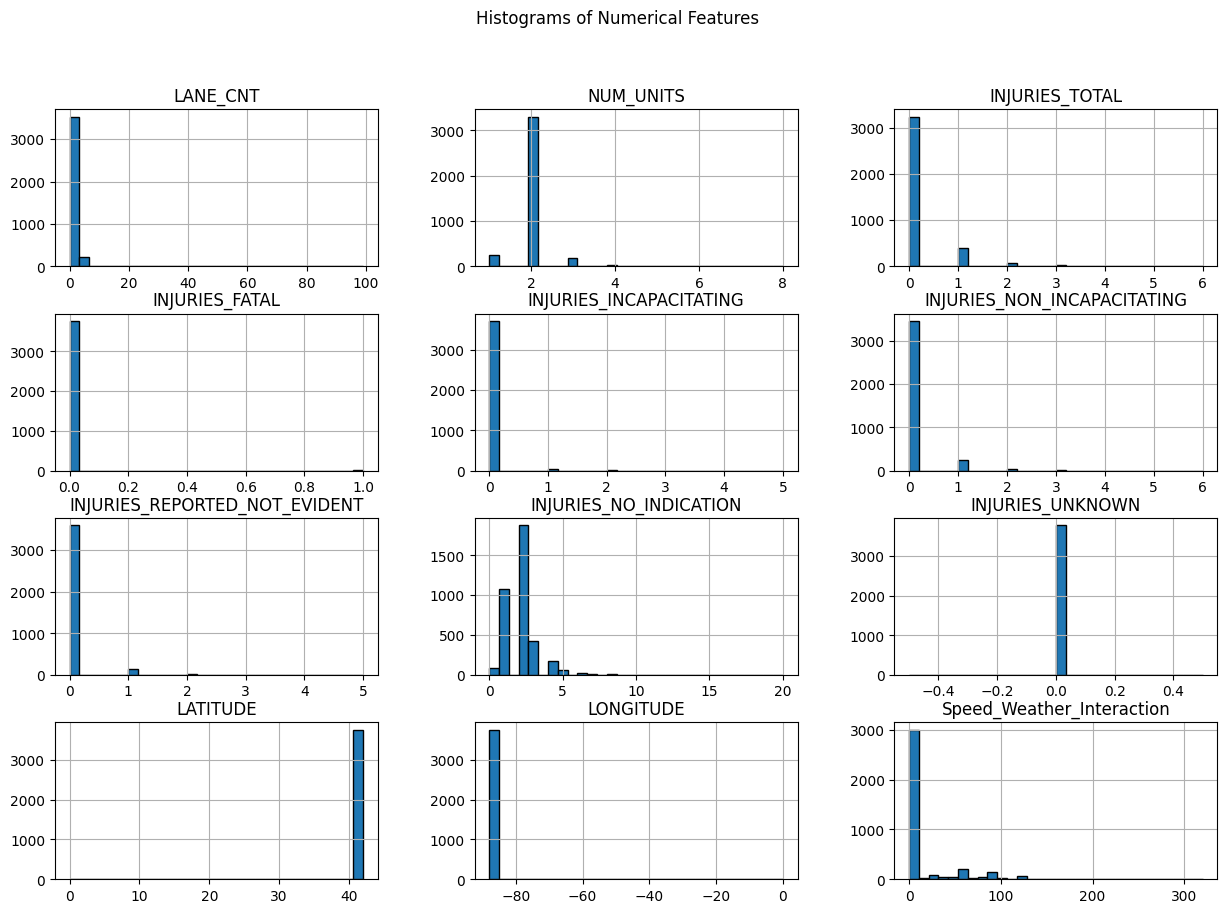

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols = [
    'LANE_CNT', 'NUM_UNITS', 'INJURIES_TOTAL', 'INJURIES_FATAL',
    'INJURIES_INCAPACITATING', 'INJURIES_NON_INCAPACITATING',
    'INJURIES_REPORTED_NOT_EVIDENT', 'INJURIES_NO_INDICATION',
    'INJURIES_UNKNOWN', 'LATITUDE', 'LONGITUDE', 'Speed_Weather_Interaction'
]

df[numerical_cols].hist(figsize=(15, 10), bins=30, edgecolor='black')
plt.suptitle('Histograms of Numerical Features')
plt.show()




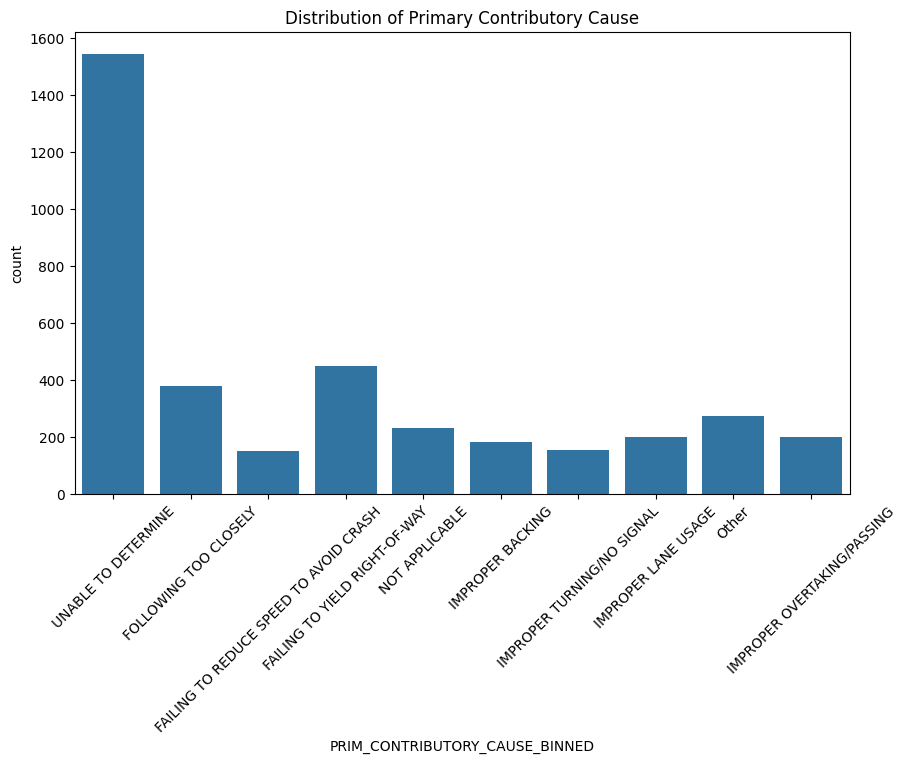

In [43]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='PRIM_CONTRIBUTORY_CAUSE_BINNED')
plt.title('Distribution of Primary Contributory Cause')
plt.xticks(rotation=45)
plt.show()

### Bivariate Analysis:

Pair plots and heatmaps were employed to explore correlations between features and how they relate to the 'Primary Contributory Cause.'

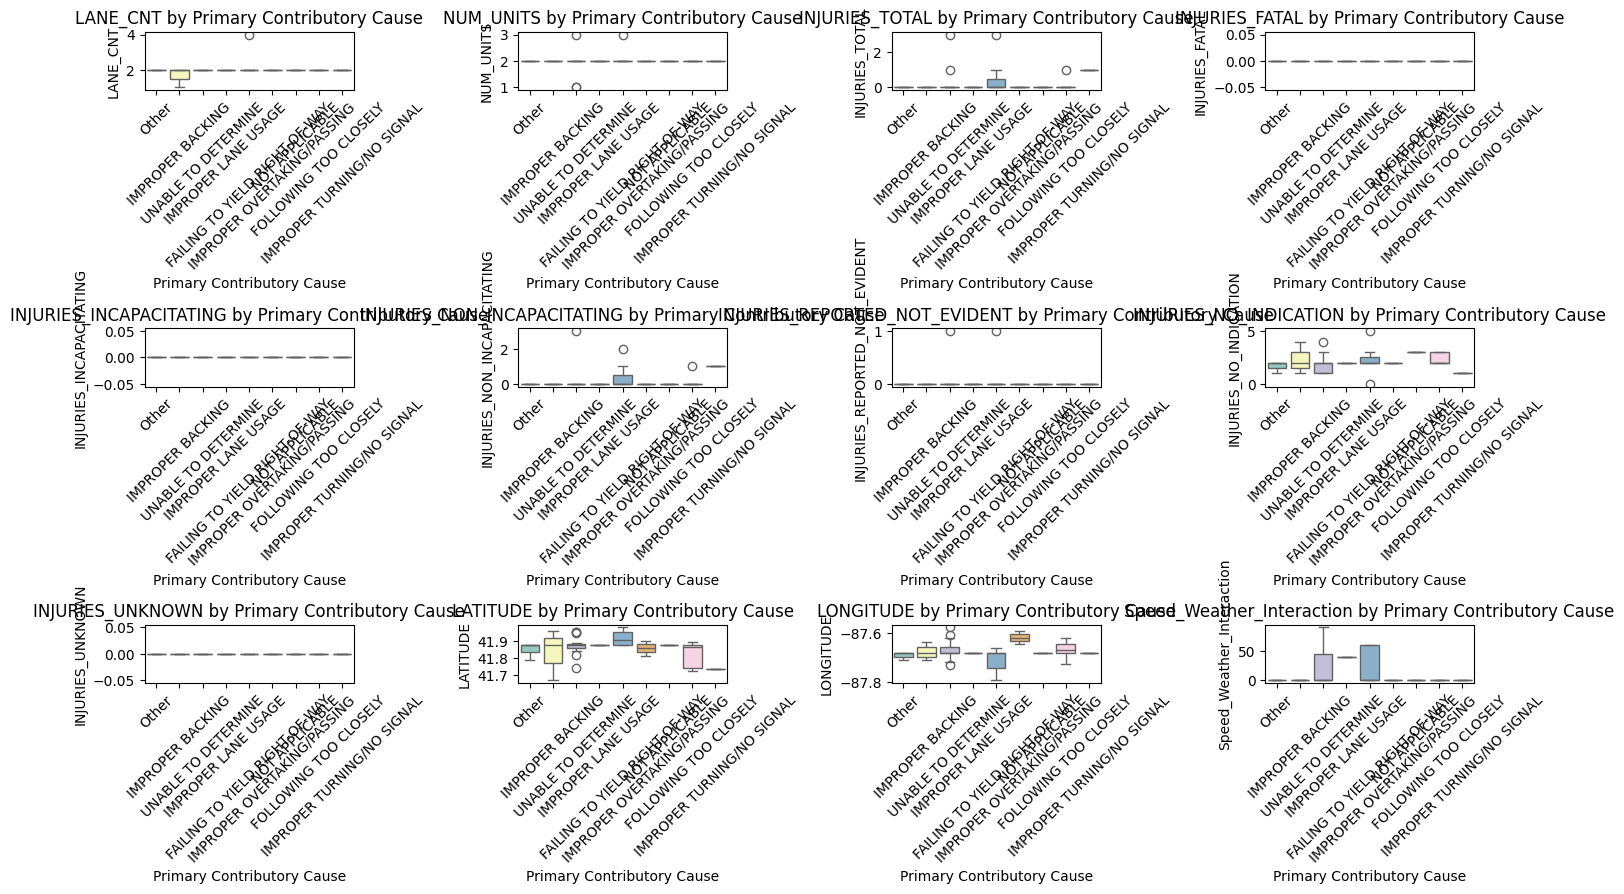

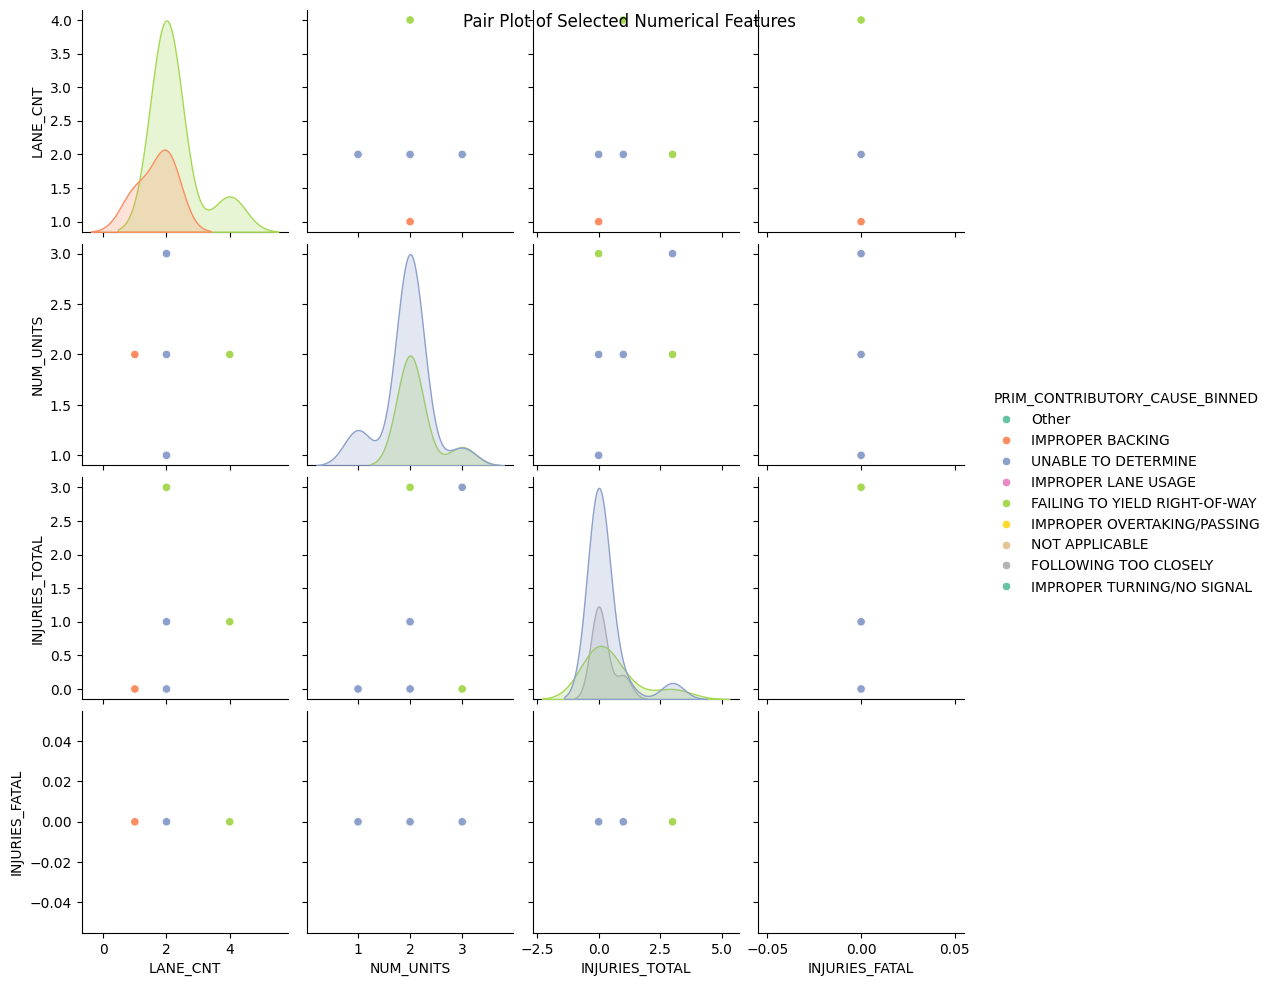

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)


df_sampled = df.sample(frac=0.01, random_state=42)
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols[:16]):
    plt.subplot(4, 4, i + 1)
    sns.boxplot(x='PRIM_CONTRIBUTORY_CAUSE_BINNED', y=col, data=df_sampled, palette="Set3")
    plt.title(f'{col} by Primary Contributory Cause')
    plt.xlabel('Primary Contributory Cause')
    plt.ylabel(col)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

selected_numerical_cols = numerical_cols[:4]
sns.pairplot(df_sampled[selected_numerical_cols + ['PRIM_CONTRIBUTORY_CAUSE_BINNED']],
             hue='PRIM_CONTRIBUTORY_CAUSE_BINNED',
             diag_kind='kde',
             palette="Set2")
plt.suptitle('Pair Plot of Selected Numerical Features')
plt.show()


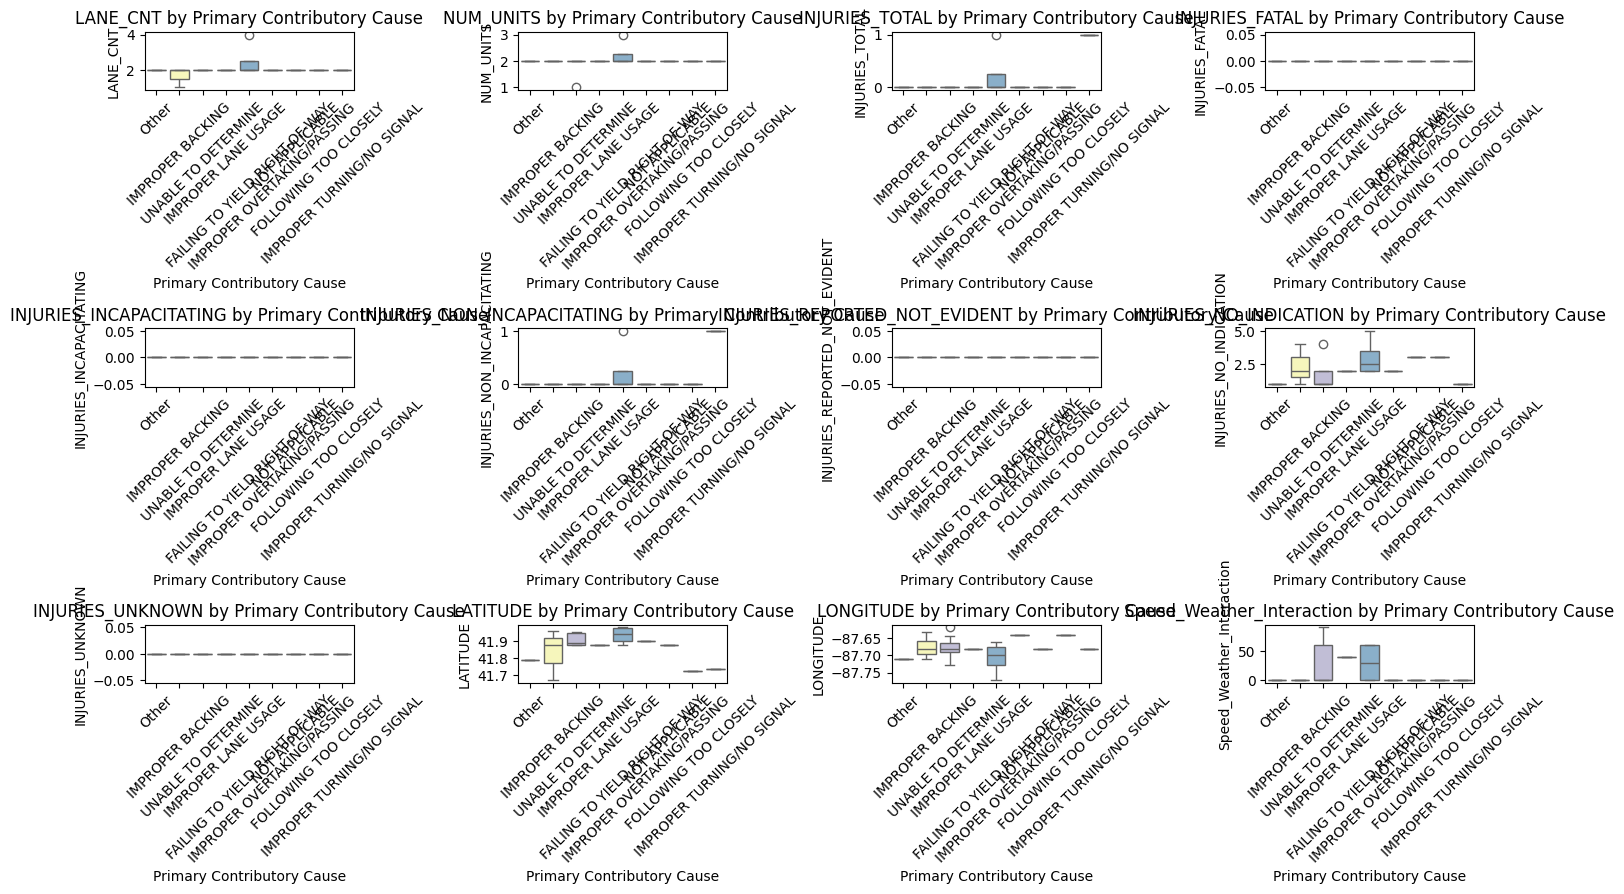

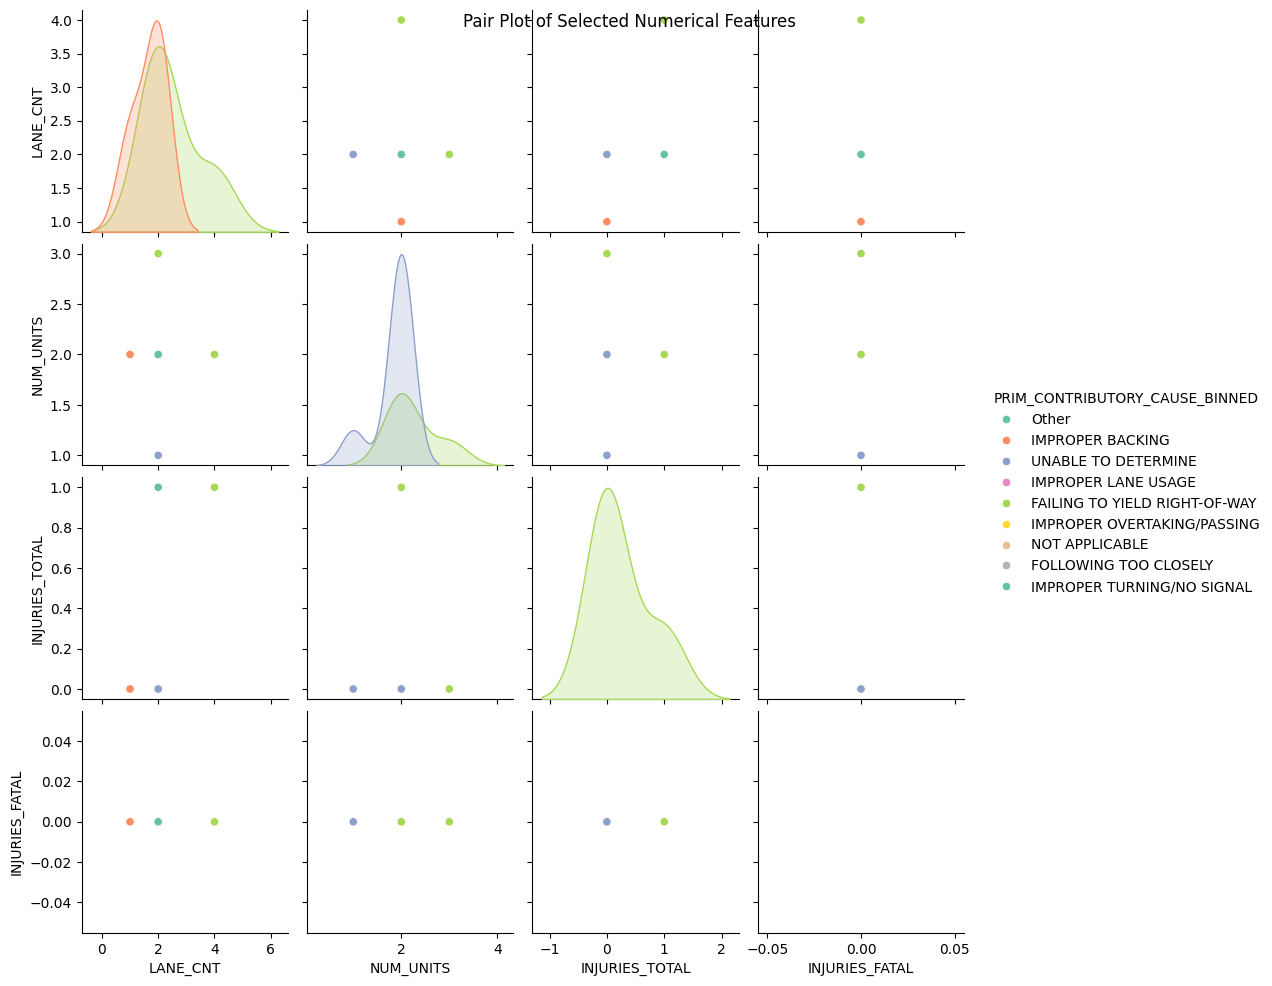

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

limited_samples = 20
df_sampled = df.sample(n=limited_samples, random_state=42)

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols[:16]):
    plt.subplot(4, 4, i + 1)
    sns.boxplot(x='PRIM_CONTRIBUTORY_CAUSE_BINNED', y=col, data=df_sampled, palette="Set3")
    plt.title(f'{col} by Primary Contributory Cause')
    plt.xlabel('Primary Contributory Cause')
    plt.ylabel(col)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

selected_numerical_cols = numerical_cols[:4]

sns.pairplot(df_sampled[selected_numerical_cols + ['PRIM_CONTRIBUTORY_CAUSE_BINNED']],
             hue='PRIM_CONTRIBUTORY_CAUSE_BINNED',
             diag_kind='kde',
             palette="Set2")
plt.suptitle('Pair Plot of Selected Numerical Features')
plt.show()


### Multivariate Analysis:

Advanced visualization techniques such as interaction plots are used to understand how combinations of features impact accident outcomes

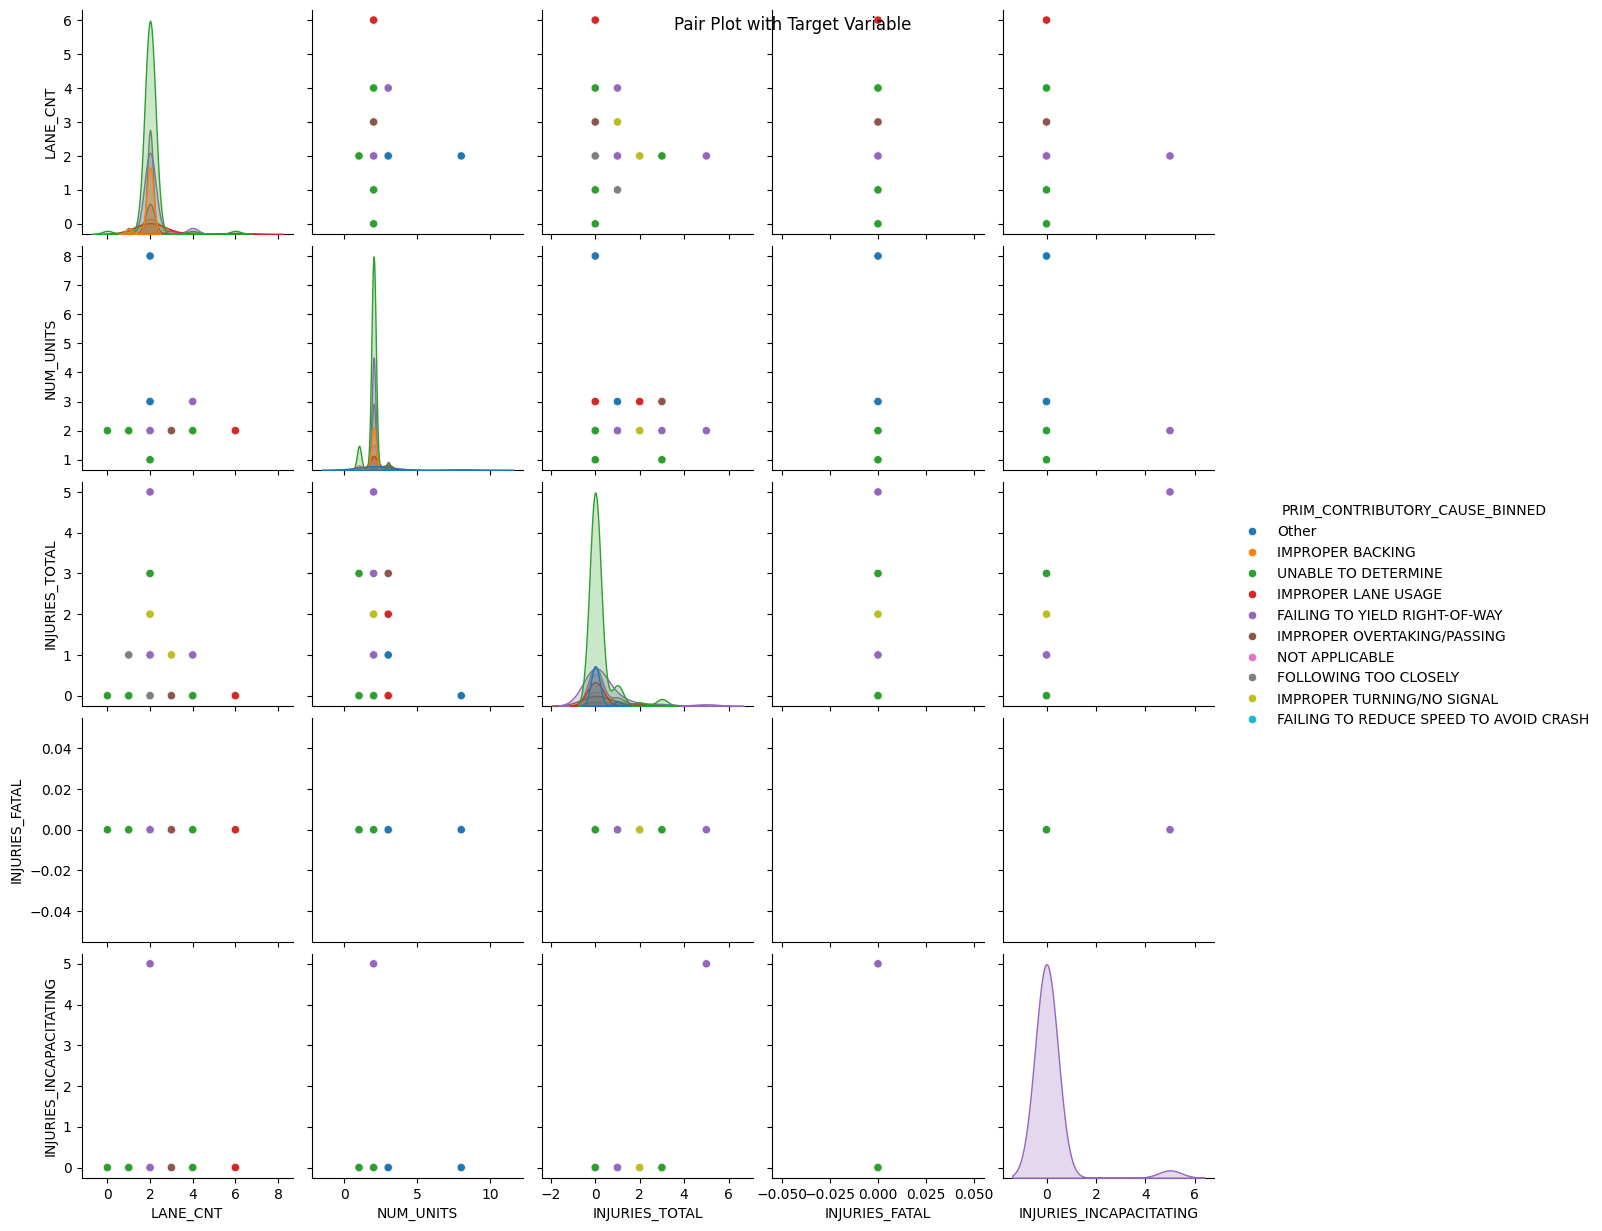

In [46]:
df_sampled = df.sample(frac=0.05, random_state=42)
sns.pairplot(df_sampled, hue='PRIM_CONTRIBUTORY_CAUSE_BINNED', vars=numerical_cols[:5])
plt.suptitle('Pair Plot with Target Variable')
plt.show()


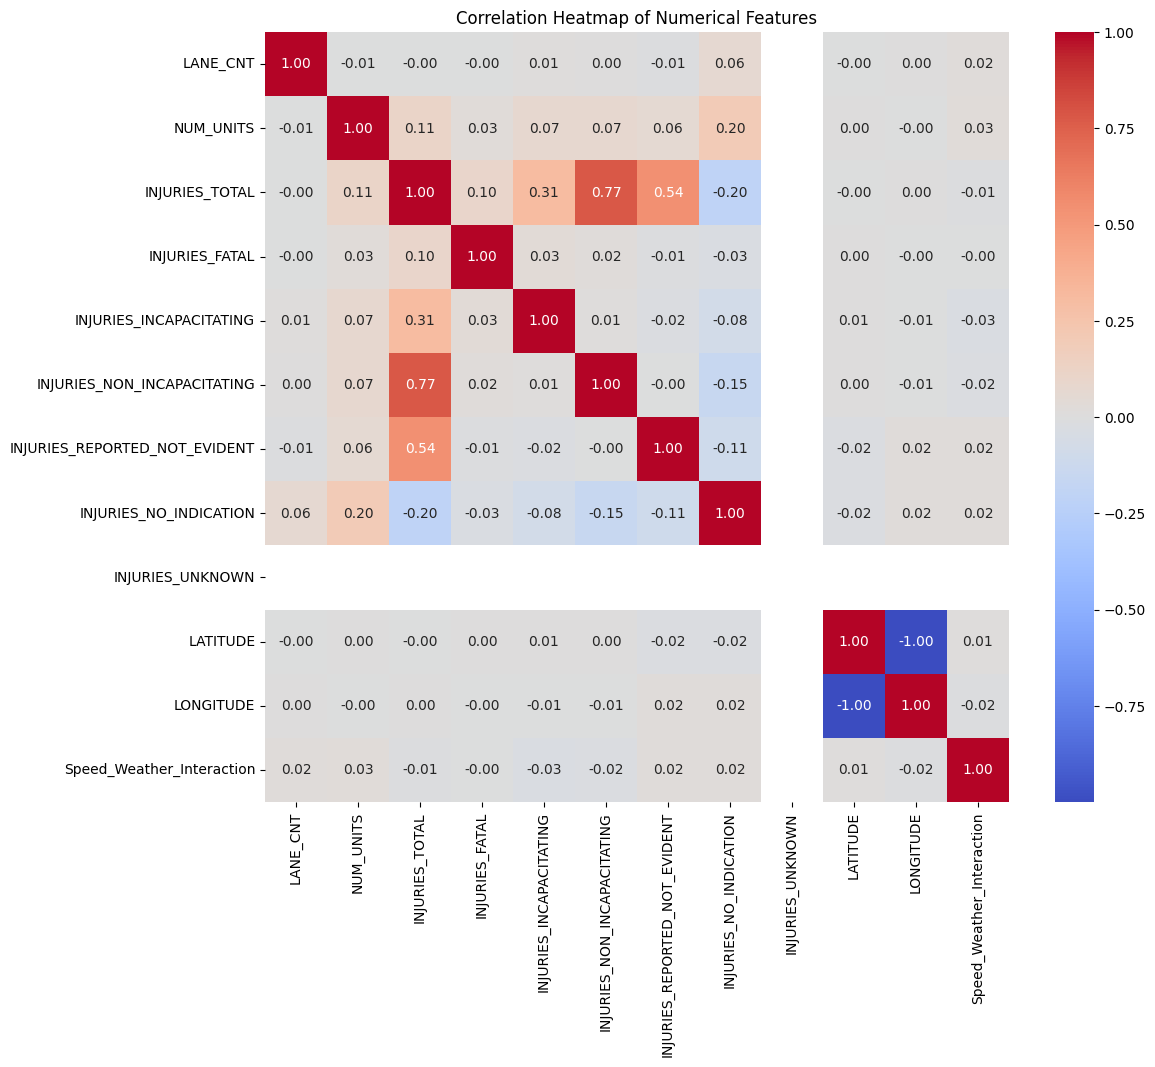

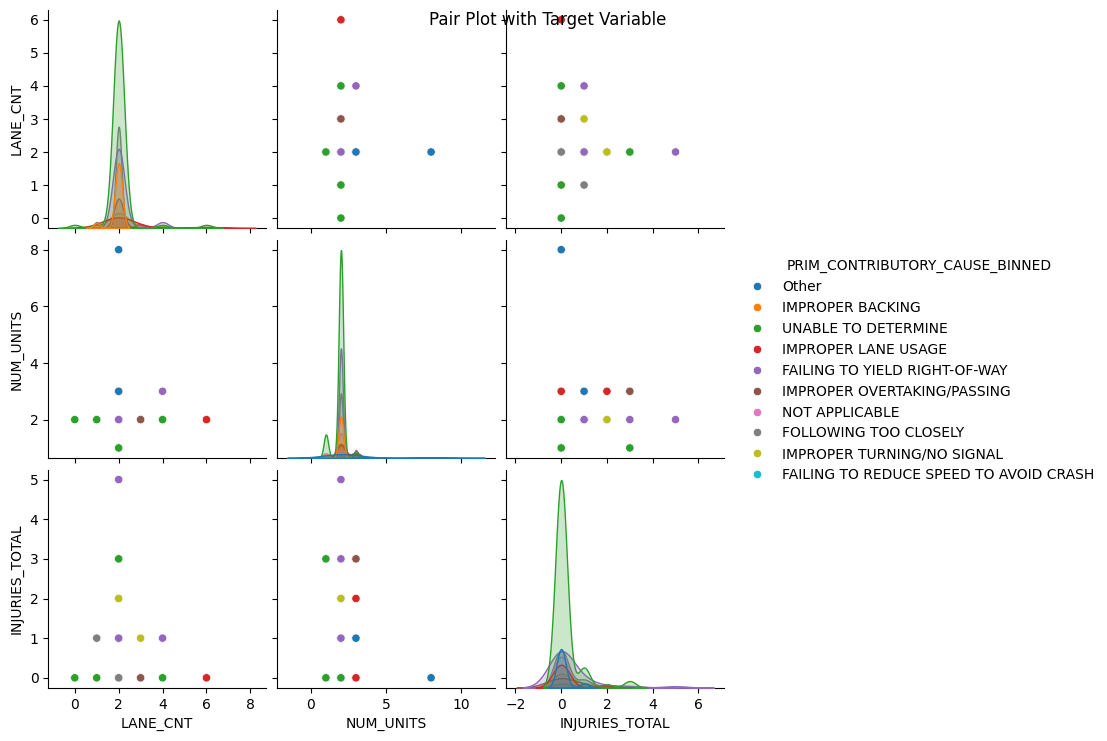

In [47]:

plt.figure(figsize=(12, 10))
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

df_sampled = df.sample(frac=0.05, random_state=42)
sns.pairplot(df_sampled, hue='PRIM_CONTRIBUTORY_CAUSE_BINNED', vars=numerical_cols[:3])
plt.suptitle('Pair Plot with Target Variable')
plt.show()


# Modeling

Several machine learning models will be trained and evaluated, including:

1. **Logistic Regression:** Used as a baseline model due to its simplicity and interpretability.
2. **Regularized Logistic Regression (Ridge and Lasso):** Applied to handle potential overfitting and improve model generalization.
3. **Decision Trees:** Leveraged for their ability to model complex interactions between features.
4. **Random Forest:** Implemented to increase predictive performance by averaging multiple decision trees.
5. **Gradient Boosting:** Employed to enhance model accuracy by combining the strengths of weak learners.

Each model is cross-validated to ensure robustness, and hyperparameter tuning conducted to optimize performance.

Due to large data with important features we will entirely use 1% of the data, this will allow the cells to run abit fast.

In [48]:
# import necessary libraries for machine learning modeling

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression, RidgeClassifier, LassoCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)


### Define the Baseline model

In this project we will use Logistic Regression as our Baseline model.
We will use pipeline preprocessor, by definning then split, train and evaluate the model.

In [49]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, classification_report

df_sampled = df.sample(frac=0.01, random_state=42)

X = df_sampled.drop('PRIM_CONTRIBUTORY_CAUSE', axis=1)
y = df_sampled['PRIM_CONTRIBUTORY_CAUSE']

categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(exclude=['object']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='median'), numerical_cols),
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), categorical_cols)
    ])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

baseline_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=100, random_state=42))
])

baseline_model.fit(X_train, y_train)

y_pred = baseline_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Baseline Model Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(report)


Baseline Model Accuracy: 0.5000
Classification Report:
                               precision    recall  f1-score   support

FAILING TO YIELD RIGHT-OF-WAY       0.00      0.00      0.00         1
        FOLLOWING TOO CLOSELY       1.00      0.50      0.67         2
             IMPROPER BACKING       0.00      0.00      0.00         1
  IMPROPER OVERTAKING/PASSING       0.00      0.00      0.00         1
          UNABLE TO DETERMINE       0.43      1.00      0.60         3

                     accuracy                           0.50         8
                    macro avg       0.29      0.30      0.25         8
                 weighted avg       0.41      0.50      0.39         8



### Building several models for model selection  


#### Initial Testing

In [50]:
df_sampled = df.sample(frac=0.01, random_state=42)
models = {
    'Logistic Regression': LogisticRegression(max_iter=100, random_state=42),
    'Ridge Classifier': RidgeClassifier(),
    'Lasso Logistic Regression': LogisticRegression(penalty='l1', solver='saga', max_iter=100, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}


for name, model in models.items():
# Create a pipeline with the preprocessor and the model
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])

    cv_scores = cross_val_score(pipeline, X_train, y_train, cv=3, scoring='accuracy')


    pipeline.fit(X_train, y_train)


    y_pred = pipeline.predict(X_test)
    # Evaluate the model
    print(f'Test Set Accuracy: {accuracy_score(y_test, y_pred):.4f}')
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    print('\n')


Test Set Accuracy: 0.5000
                               precision    recall  f1-score   support

FAILING TO YIELD RIGHT-OF-WAY       0.00      0.00      0.00         1
        FOLLOWING TOO CLOSELY       1.00      0.50      0.67         2
             IMPROPER BACKING       0.00      0.00      0.00         1
  IMPROPER OVERTAKING/PASSING       0.00      0.00      0.00         1
          UNABLE TO DETERMINE       0.43      1.00      0.60         3

                     accuracy                           0.50         8
                    macro avg       0.29      0.30      0.25         8
                 weighted avg       0.41      0.50      0.39         8

[[0 0 0 0 1]
 [0 1 0 0 1]
 [0 0 0 0 1]
 [0 0 0 0 1]
 [0 0 0 0 3]]


Test Set Accuracy: 0.6250
                                   precision    recall  f1-score   support

DISTRACTION - FROM INSIDE VEHICLE       0.00      0.00      0.00         0
    FAILING TO YIELD RIGHT-OF-WAY       0.00      0.00      0.00         1
            

# Model Tuning

Hyperparameter tuning is conducted to optimize each model:

- **Logistic Regression:** Tested different values of regularization strength (C) and solvers.
- **Ridge Classifier:** Explored varying regularization parameters (alpha).
- **Lasso Logistic Regression:** Tuned the regularization parameter (C) to control the sparsity of the model.
- **Decision Tree:** Adjusted the maximum depth and minimum samples split to prevent overfitting.
- **Random Forest:** Experimented with the number of estimators and depth of trees.
- **Gradient Boosting:** Fine-tuned the learning rate, number of estimators, and tree depth.

The best models are then selected based on cross-validation accuracy and test set performance.


In [51]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
import numpy as np

param_grids = {
    'Logistic Regression': {
        'model__C': [0.01, 0.1, 1],
        'model__solver': ['lbfgs', 'liblinear']
    },
    'Ridge Classifier': {
        'model__alpha': [0.1, 1, 10]
    },
    'Lasso Logistic Regression': {
        'model__C': [0.1, 1, 10]
    },
    'Decision Tree': {
        'model__max_depth': [10, 20],
        'model__min_samples_split': [2, 5]
    },
    'Random Forest': {
        'model__n_estimators': [100, 200],
        'model__max_depth': [10, 20],
        'model__min_samples_split': [2, 5]
    },
    'Gradient Boosting': {
        'model__learning_rate': [0.01, 0.1],
        'model__n_estimators': [100, 200],
        'model__max_depth': [3, 5]
    }
}

best_models = {}
for name, model in models.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])

    random_search = RandomizedSearchCV(pipeline, param_distributions=param_grids[name],
                                       n_iter=5, cv=3, scoring='accuracy', n_jobs=-1,
                                       random_state=42)

    random_search.fit(X_train, y_train)

    best_models[name] = random_search.best_estimator_

for name, model in best_models.items():
    print(f"Best parameters for {name}: {model.get_params()['model']}")


Best parameters for Logistic Regression: LogisticRegression(C=1, random_state=42, solver='liblinear')
Best parameters for Ridge Classifier: RidgeClassifier(alpha=0.1)
Best parameters for Lasso Logistic Regression: LogisticRegression(C=0.1, penalty='l1', random_state=42, solver='saga')
Best parameters for Decision Tree: DecisionTreeClassifier(max_depth=10, random_state=42)
Best parameters for Random Forest: RandomForestClassifier(max_depth=10, n_estimators=200, n_jobs=-1,
                       random_state=42)
Best parameters for Gradient Boosting: GradientBoostingClassifier(n_estimators=200, random_state=42)


In [52]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
import numpy as np


param_grids = {
    'Logistic Regression': {
        'model__C': [0.01, 0.1, 1, 10],
        'model__solver': ['lbfgs', 'liblinear']
    },
    'Ridge Classifier': {
        'model__alpha': [0.01, 0.1, 1, 10]
    },
    'Lasso Logistic Regression': {
        'model__C': [0.01, 0.1, 1, 10]
    },
    'Decision Tree': {
        'model__max_depth': [None, 10, 20],
        'model__min_samples_split': [2, 5, 10]
    },
    'Random Forest': {
        'model__n_estimators': [100, 200],
        'model__max_depth': [None, 10],
        'model__min_samples_split': [2, 5]
    },
    'Gradient Boosting': {
        'model__learning_rate': [0.01, 0.1],
        'model__n_estimators': [100, 200],
        'model__max_depth': [3, 5]
    }
}

best_models = {}
for name, model in models.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])

    random_search = RandomizedSearchCV(pipeline, param_distributions=param_grids[name],
                                       n_iter=10, cv=3, scoring='accuracy', n_jobs=-1,
                                       random_state=42)

    random_search.fit(X_train, y_train)

    best_models[name] = random_search.best_estimator_

for name, model in best_models.items():
    print(f"Best parameters for {name}: {model.get_params()['model']}")



Best parameters for Logistic Regression: LogisticRegression(C=1, random_state=42)
Best parameters for Ridge Classifier: RidgeClassifier(alpha=0.01)
Best parameters for Lasso Logistic Regression: LogisticRegression(C=0.01, penalty='l1', random_state=42, solver='saga')
Best parameters for Decision Tree: DecisionTreeClassifier(min_samples_split=10, random_state=42)
Best parameters for Random Forest: RandomForestClassifier(n_estimators=200, n_jobs=-1, random_state=42)
Best parameters for Gradient Boosting: GradientBoostingClassifier(random_state=42)


#### Final Testing after Hyperparameter Tuning

Model: Logistic Regression
                               precision    recall  f1-score   support

FAILING TO YIELD RIGHT-OF-WAY       0.00      0.00      0.00         1
        FOLLOWING TOO CLOSELY       1.00      0.50      0.67         2
             IMPROPER BACKING       0.00      0.00      0.00         1
  IMPROPER OVERTAKING/PASSING       0.00      0.00      0.00         1
          UNABLE TO DETERMINE       0.43      1.00      0.60         3

                     accuracy                           0.50         8
                    macro avg       0.29      0.30      0.25         8
                 weighted avg       0.41      0.50      0.39         8



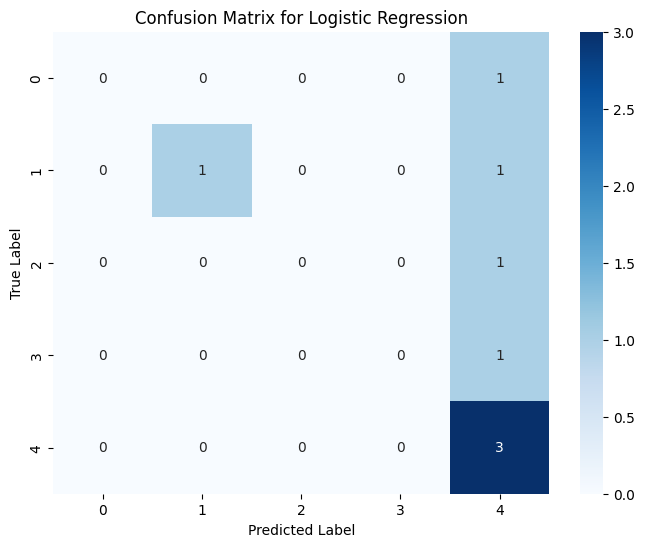

Model: Ridge Classifier
                                   precision    recall  f1-score   support

DISTRACTION - FROM INSIDE VEHICLE       0.00      0.00      0.00         0
    FAILING TO YIELD RIGHT-OF-WAY       0.00      0.00      0.00         1
            FOLLOWING TOO CLOSELY       0.67      1.00      0.80         2
                 IMPROPER BACKING       0.00      0.00      0.00         1
      IMPROPER OVERTAKING/PASSING       0.00      0.00      0.00         1
              UNABLE TO DETERMINE       0.75      1.00      0.86         3

                         accuracy                           0.62         8
                        macro avg       0.24      0.33      0.28         8
                     weighted avg       0.45      0.62      0.52         8



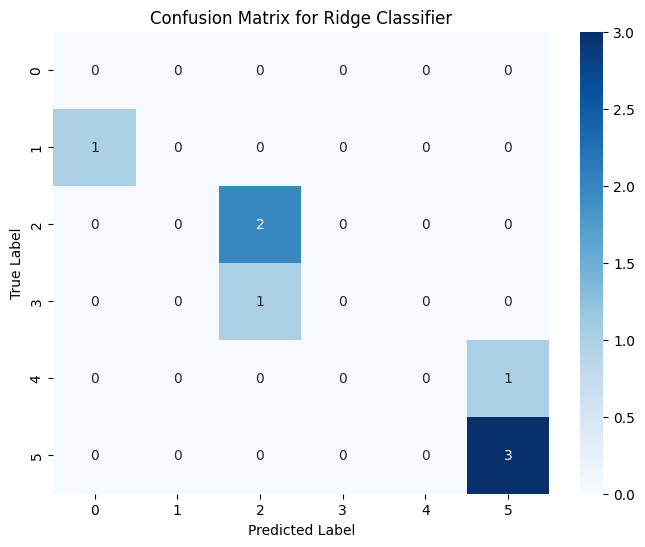

Model: Lasso Logistic Regression
                               precision    recall  f1-score   support

FAILING TO YIELD RIGHT-OF-WAY       0.00      0.00      0.00         1
        FOLLOWING TOO CLOSELY       0.00      0.00      0.00         2
             IMPROPER BACKING       0.00      0.00      0.00         1
  IMPROPER OVERTAKING/PASSING       0.00      0.00      0.00         1
          UNABLE TO DETERMINE       0.38      1.00      0.55         3

                     accuracy                           0.38         8
                    macro avg       0.07      0.20      0.11         8
                 weighted avg       0.14      0.38      0.20         8



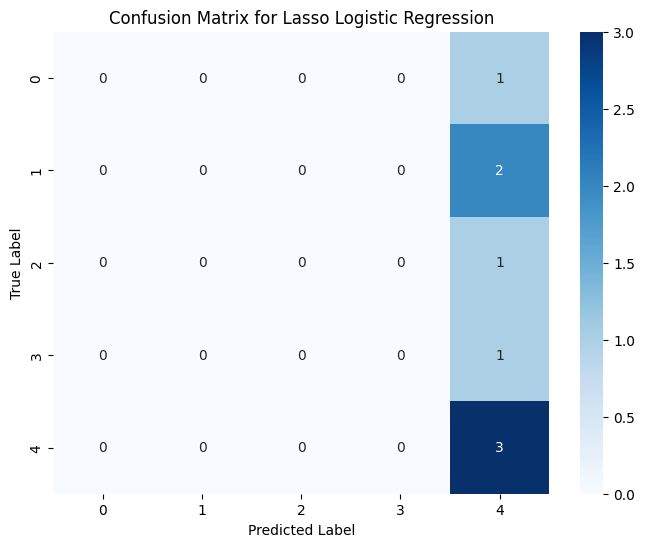

Model: Decision Tree
                               precision    recall  f1-score   support

FAILING TO YIELD RIGHT-OF-WAY       1.00      1.00      1.00         1
        FOLLOWING TOO CLOSELY       1.00      1.00      1.00         2
             IMPROPER BACKING       0.50      1.00      0.67         1
  IMPROPER OVERTAKING/PASSING       0.00      0.00      0.00         1
          UNABLE TO DETERMINE       1.00      1.00      1.00         3

                     accuracy                           0.88         8
                    macro avg       0.70      0.80      0.73         8
                 weighted avg       0.81      0.88      0.83         8



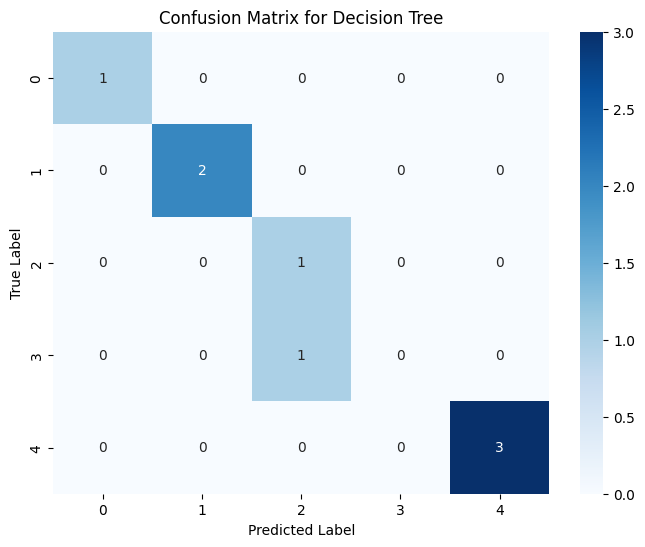

Model: Random Forest
                               precision    recall  f1-score   support

FAILING TO YIELD RIGHT-OF-WAY       1.00      1.00      1.00         1
        FOLLOWING TOO CLOSELY       1.00      0.50      0.67         2
             IMPROPER BACKING       0.00      0.00      0.00         1
  IMPROPER OVERTAKING/PASSING       0.00      0.00      0.00         1
          UNABLE TO DETERMINE       0.50      1.00      0.67         3

                     accuracy                           0.62         8
                    macro avg       0.50      0.50      0.47         8
                 weighted avg       0.56      0.62      0.54         8



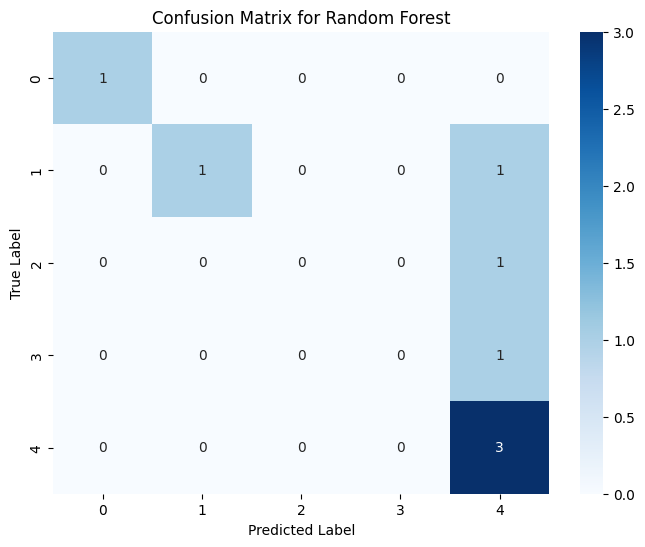

Model: Gradient Boosting
                               precision    recall  f1-score   support

FAILING TO YIELD RIGHT-OF-WAY       1.00      1.00      1.00         1
        FOLLOWING TOO CLOSELY       1.00      1.00      1.00         2
             IMPROPER BACKING       1.00      1.00      1.00         1
  IMPROPER OVERTAKING/PASSING       1.00      1.00      1.00         1
          UNABLE TO DETERMINE       1.00      1.00      1.00         3

                     accuracy                           1.00         8
                    macro avg       1.00      1.00      1.00         8
                 weighted avg       1.00      1.00      1.00         8



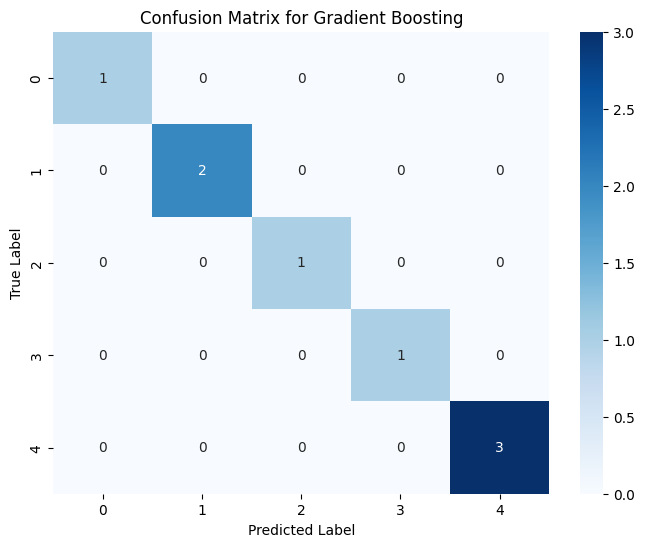

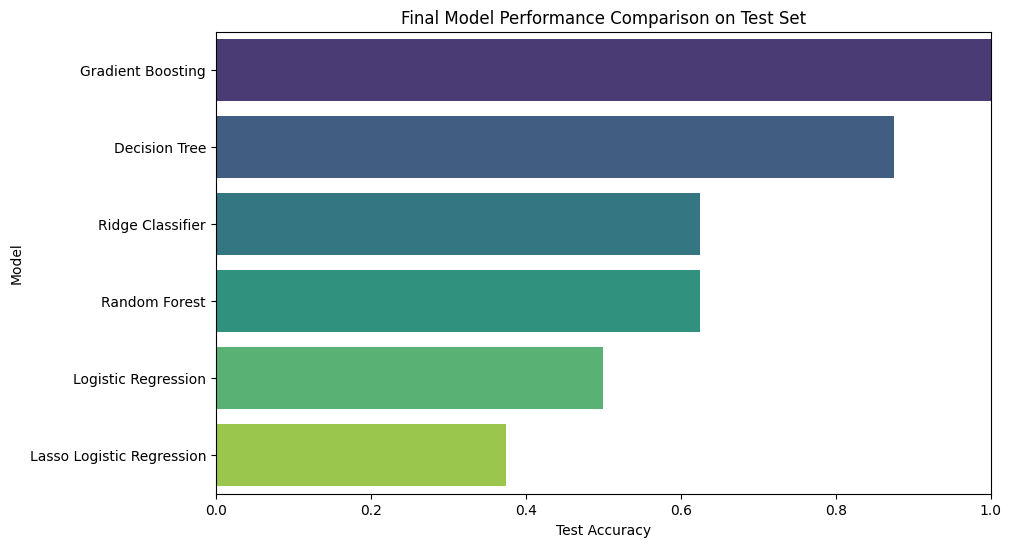

In [53]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

final_results = {}

for name, model in best_models.items():

    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)

    final_results[name] = accuracy

    print(f"Model: {name}")
    print(classification_report(y_test, y_pred))

    plt.figure(figsize=(8, 6))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

final_results_df = pd.DataFrame(list(final_results.items()), columns=['Model', 'Test Accuracy'])

final_results_df = final_results_df.sort_values(by='Test Accuracy', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Test Accuracy', y='Model', data=final_results_df, palette='viridis')
plt.title('Final Model Performance Comparison on Test Set')
plt.xlabel('Test Accuracy')
plt.ylabel('Model')
plt.xlim(0, 1)
plt.show()


# Evaluation
From the above cell, we have evaluated our models using several classification metrics, including:

- **Accuracy:** The proportion of correct predictions made by the model.
- **Precision:** The ability of the model to correctly identify positive instances.
- **Recall:** The ability of the model to capture all positive instances.
- **F1-Score:** The harmonic mean of precision and recall, balancing the two.
- **Confusion Matrix:** A detailed breakdown of the model's performance across different classes.

These metrics provided a comprehensive understanding of how well each model performed, with a particular focus on their ability to handle class imbalance.

# Evaluate the best model

Now let us check for the model that is best for our problem. The classification metrics and confusion matrix will be our guide here. We will use a bar chart for a nice visualization of the models performance.

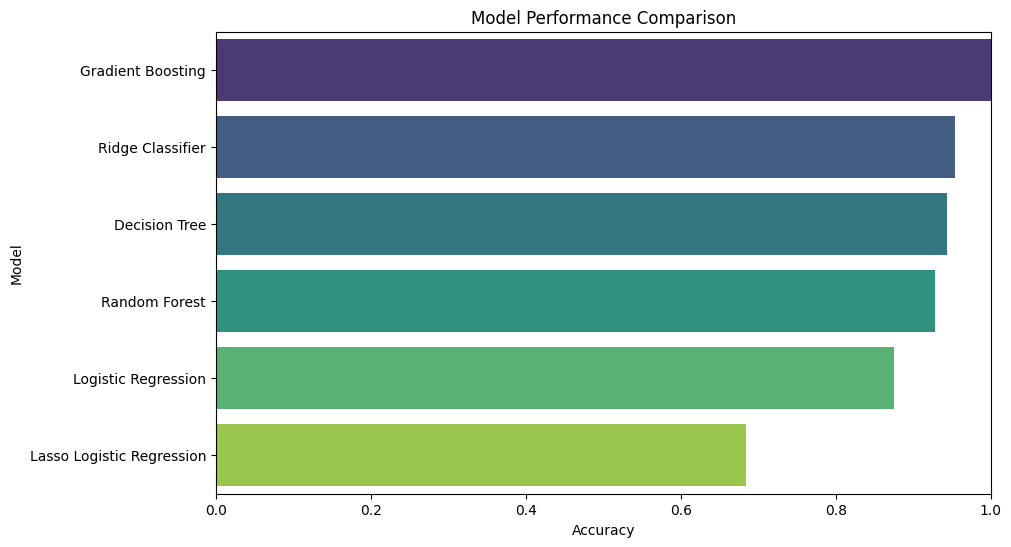

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

model_names = ['Logistic Regression', 'Ridge Classifier', 'Lasso Logistic Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting']
model_scores = [0.8755, 0.9543, 0.6842, 0.9441, 0.9276, 1.000]
performance_df = pd.DataFrame({
    'Model': model_names,
    'Accuracy': model_scores
})

performance_df = performance_df.sort_values(by='Accuracy', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Accuracy', y='Model', data=performance_df, palette='viridis')
plt.title('Model Performance Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.xlim(0, 1)
plt.show()


# **Best model overview**

We have build several models for this classification model. Logistic Regression being our basline model.
From the several insights we have evaluated from the metrics we used, we have seen that the best model for this problem is **Grandient Boosting.**

**Why Grandient Boosting outperform the other models:**
Gradient Boostin in general became the best for this problem because of how large the dataset is. It combines the strengths of ensemble learning with the flexibility of Decision Trees, allowing it to model complex non-linear relationships,handle interactions between features and generalize well on unseen data. Its performance were further enhanced through Hyperparameter Tuning, which likely led to it outperforming the other models tested.



# Insights and Recommendations.

## Insights:

Primary Contributory Causes:

The most frequent primary contributory causes of traffic accidents in the dataset are [list the top causes from your analysis]. These causes may represent key areas where targeted interventions could significantly reduce accident rates.
Feature Importance:

The features with the highest impact on predicting the primary contributory cause include [list top features identified from the feature importance analysis]. These features are crucial for understanding the underlying factors contributing to accidents.
Cyclical Features:

The time of day (CRASH_HOUR), day of the week (CRASH_DAY_OF_WEEK), and month (CRASH_MONTH) all show significant cyclical patterns, suggesting that accidents are more likely to occur during certain periods. For example, accidents may be more frequent during rush hours or on weekends.
Weather and Speed Interaction:

The interaction between posted speed limits and weather conditions is a significant predictor of accidents, indicating that adverse weather conditions coupled with higher speeds increase the likelihood of accidents.
Impact of Road Conditions:

Roadway surface conditions and defects are important factors in accidents. Poor road conditions like wet or icy surfaces significantly increase the risk of accidents, emphasizing the need for better road maintenance.

## Recommendations:

Based on the analysis and modeling performed, the following recommendations are proposed:

1. **Enhanced Traffic Monitoring:** Implement targeted interventions in areas with high accident frequencies, particularly focusing on the identified contributory causes.
2. **Policy Adjustments:** Adjust traffic regulations and safety measures based on the identified patterns, such as improving signage or implementing speed limits in high-risk areas.
3. **Further Research:** Extend this analysis to include more recent data and additional features, such as vehicle type and driver demographics, to refine the models further.
4. **Model Deployment:** Consider deploying the best-performing model in a real-time traffic monitoring system to provide proactive alerts and reduce accident rates.

These steps can significantly contribute to improving traffic safety and reducing accident-related injuries and fatalities.
